<h1>Analog System Design Mini Project</h1><br>
<b>Acquiring an ECG from a patient's body introduces some noise in the process. This needs to be removed from the ECG signal.
We tried to get a raw ecg signal online, but unfortunately, we couldn't find any. So, we have tried to demonstrate the working of our filters by introducing sinusoids of particular frequencies to our already filtered ECG signal.<br>
<br>
<i>ECG-LTSPICE.txt</i> contains the filtered ECG signal. We'll be adding noise to that and pass it through our system on LTSpice.<br>
<i>testsample2.txt</i> contains the ECG signal with noise.</b>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sci

In [2]:
file = open("E:\ASD Mini Project\ECG-LTSPICE.txt","r")
getecg = file.read() #get info from the txt file

In [3]:
getecg = getecg.split() #split the values by ' '
print(getecg)

['(0', '0', '10m', '0.00001023', '20m', '0.000019995', '30m', '0.00003627', '40m', '0.0000744', '50m', '0.000093', '60m', '0.0001116', '70m', '0.0001209', '80m', '0.0001023', '90m', '0.0000744', '100m', '0.0000372', '110m', '0', '120m', '-0.0000186', '130m', '-0.0000279', '140m', '-0.0000279', '150m', '-0.0000372', '160m', '-0.0000465', '170m', '-0.0000558', '180m', '-0.0000651', '190m', '-0.0000744', '200m', '-0.0000837', '210m', '-0.000093', '220m', '-0.0001116', '230m', '-0.0001302', '240m', '-0.0001488', '250m', '-0.0001767', '260m', '-0.0002232', '270m', '-0.0002604', '280m', '-0.000279', '290m', '-0.0002511', '300m', '-0.000093', '310m', '0.000465', '320m', '0.00186', '330m', '0.002046', '340m', '0.0016275', '350m', '0', '360m', '-0.000186', '370m', '-0.000372', '380m', '-0.0004185', '390m', '-0.0003255', '400m', '-0.000186', '410m', '-0.0001395', '420m', '-0.000093', '430m', '-0.0000465', '440m', '-0.0000186', '450m', '-0.0000093', '460m', '0', '470m', '0', '480m', '0', '490m', 

In [4]:
filtered_ecg = []
getecg[len(getecg)-1] = '0'
for i in range(1,len(getecg),2):
    filtered_ecg.append(float(getecg[i])) #get the amplitudes only
print(filtered_ecg)
#print(len(filtered_ecg))

[0.0, 1.023e-05, 1.9995e-05, 3.627e-05, 7.44e-05, 9.3e-05, 0.0001116, 0.0001209, 0.0001023, 7.44e-05, 3.72e-05, 0.0, -1.86e-05, -2.79e-05, -2.79e-05, -3.72e-05, -4.65e-05, -5.58e-05, -6.51e-05, -7.44e-05, -8.37e-05, -9.3e-05, -0.0001116, -0.0001302, -0.0001488, -0.0001767, -0.0002232, -0.0002604, -0.000279, -0.0002511, -9.3e-05, 0.000465, 0.00186, 0.002046, 0.0016275, 0.0, -0.000186, -0.000372, -0.0004185, -0.0003255, -0.000186, -0.0001395, -9.3e-05, -4.65e-05, -1.86e-05, -9.3e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.207e-06, 1.86e-05, 3.72e-05, 4.65e-05, 6.51e-05, 8.37e-05, 0.0001023, 0.0001209, 0.0001488, 0.0001953, 0.0002325, 0.0002511, 0.0002604, 0.0002418, 0.000186, 0.0001395, 9.3e-05, 5.58e-05, 2.79e-05, 1.86e-05, 9.3e-06, 9.3e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


<b>We see that, the ECG signal we just extracted from the txt file has only 101 samples. This is a relatively small number. Since we'll be adding sinusoids as noise signals, we can come across the problem of Aliasing, as the sampling frequency is quite small. To overcome this problem, we will resample the ECG signal such that it now has 101x40 i.e., 4040 samples. We will use the method of linear interpolation for resampling the signal.</b>

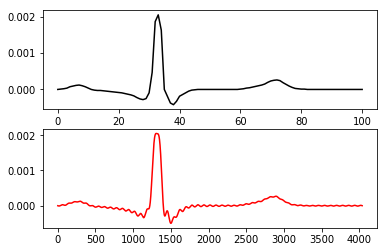

In [5]:
filtered_ecg = np.array(filtered_ecg)
samples=101
sample_new = 4040
filtered_ecg_resampled = sci.resample(filtered_ecg, sample_new)
f,arr = plt.subplots(2,1)
arr[0].plot(np.arange(samples), filtered_ecg, 'k', label='Normal ECG')
arr[1].plot(np.arange(sample_new), filtered_ecg_resampled, 'r', label='Resampled ECG')
plt.show()

<b>After resampling the ECG signal, we see that the resampled signal is not smooth like the original signal. To get rid of the sharp peaks, we use a digital filter called the Savitzky-Golay filter. This filter uses convolution to fit a polynomial of some degree to the data points by the method of linear least squares. Savitzky-Golay filter is generally used to 'denoise' a signal.</b>

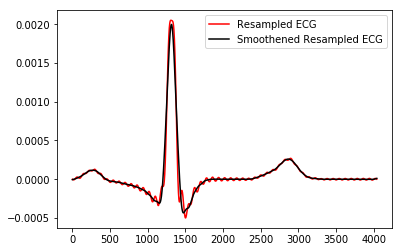

In [6]:
yhat = sci.savgol_filter(filtered_ecg_resampled,225,3, delta=3) #implement Savitzky-Golay filter of window_length 225 
plt.plot(np.arange(sample_new), filtered_ecg_resampled, 'r', label='Resampled ECG') #and polynomial order 3
plt.plot(np.arange(len(yhat)), yhat, 'k', label='Smoothened Resampled ECG')
plt.legend()
plt.show()

<h2>Introducing Noise by Adding Sinusoids</h2><br>
<b>We'll be adding three types of noise-
<ul>
<li>Low frequency noise</li>
<li>High frequency noise</li>
<li>50Hz noise</li>
</ul></b>

<b>Low Frequency Noise- 0.2Hz</b>

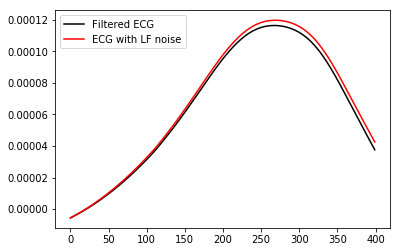

In [13]:
time = np.arange(sample_new)
lf_amp = 4e-5
lf = 0.2
lf_noise = lf_amp*np.sin(2*np.pi*lf*(time/sample_new))
lf_noise_ecg = yhat + lf_noise
plt.plot(time[:400], yhat[:400], 'k', label='Filtered ECG')
plt.plot(time[:400], lf_noise_ecg[:400], 'r', label='ECG with LF noise')
#plt.plot(time, lf_noise)
plt.legend()
plt.show()

<b>High Frequency Noise- 200Hz</b>

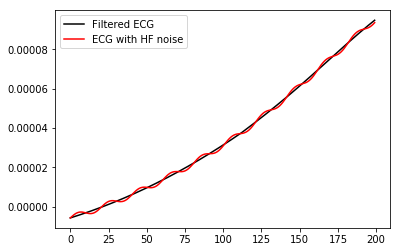

In [14]:
time = np.arange(sample_new)
hf_amp = 1.5e-6
hf = 200
hf_noise = hf_amp*np.sin(2*np.pi*hf*time/sample_new)
hf_noise_ecg = yhat + hf_noise
plt.plot(time[:200], yhat[:200], 'k', label='Filtered ECG')
plt.plot(time[:200], hf_noise_ecg[:200], 'r', label='ECG with HF noise')
#plt.plot(time, hf_noise)
plt.legend()
plt.show()

<b>50Hz Noise</b>

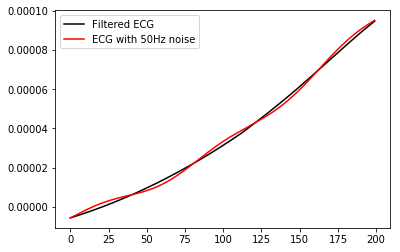

In [15]:
time = np.arange(sample_new)
nf_amp = 2e-6
nf = 50
nf_noise = nf_amp*np.sin(2*np.pi*nf*time/sample_new)
nf_noise_ecg = yhat + nf_noise
plt.plot(time[:200], yhat[:200], 'k', label='Filtered ECG')
plt.plot(time[:200], nf_noise_ecg[:200], 'r', label='ECG with 50Hz noise')
#plt.plot(time, nf_noise)
plt.legend()
plt.show()

<b>Adding everything at once.</b>

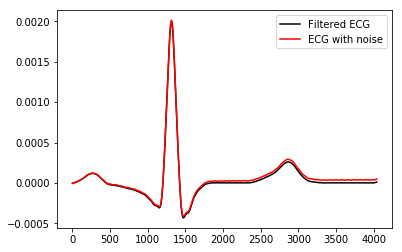

In [16]:
noise_ecg = yhat + lf_noise + hf_noise + nf_noise
plt.plot(time, yhat, 'k', label='Filtered ECG')
plt.plot(time, noise_ecg, 'r', label='ECG with noise')
plt.legend()
plt.show()

<b>We need to resample the signal again, as passing so many sample points to our LTSpice file doesn't seem viable. The number of samples after this operation will be 101, the number we started with.</b>

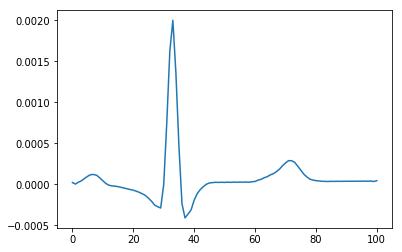

In [17]:
final_samples = 101
final_ecg = sci.resample(noise_ecg,101)
plt.plot(np.arange(final_samples), final_ecg)
plt.show()

In [18]:
putecg = open(r"E:\ASD Mini Project\testsignal2.txt", "w")
putecg.write("(")
for i in range(len(final_ecg)):
    putecg.write(f"{i*10}m {final_ecg[i]} ")
putecg.write(")")
putecg.close()